# Bike Sharing Case Study

**Problem Statement**

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

The requirement is to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features.

# Reading and Understanding the Data

In [1]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
# target variable selected based on problem statement. cnt: total bike rentals for the day
target_variable = 'cnt'

# list of categorical variables from the dataframe
categorical_variables = [
    'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit'
]

#list of numerical variables
numeric_variables = ['temp', 'atemp', 'hum', 'windspeed']

# Visualising Data

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

## Visualizing the numeric variables using PairPlot

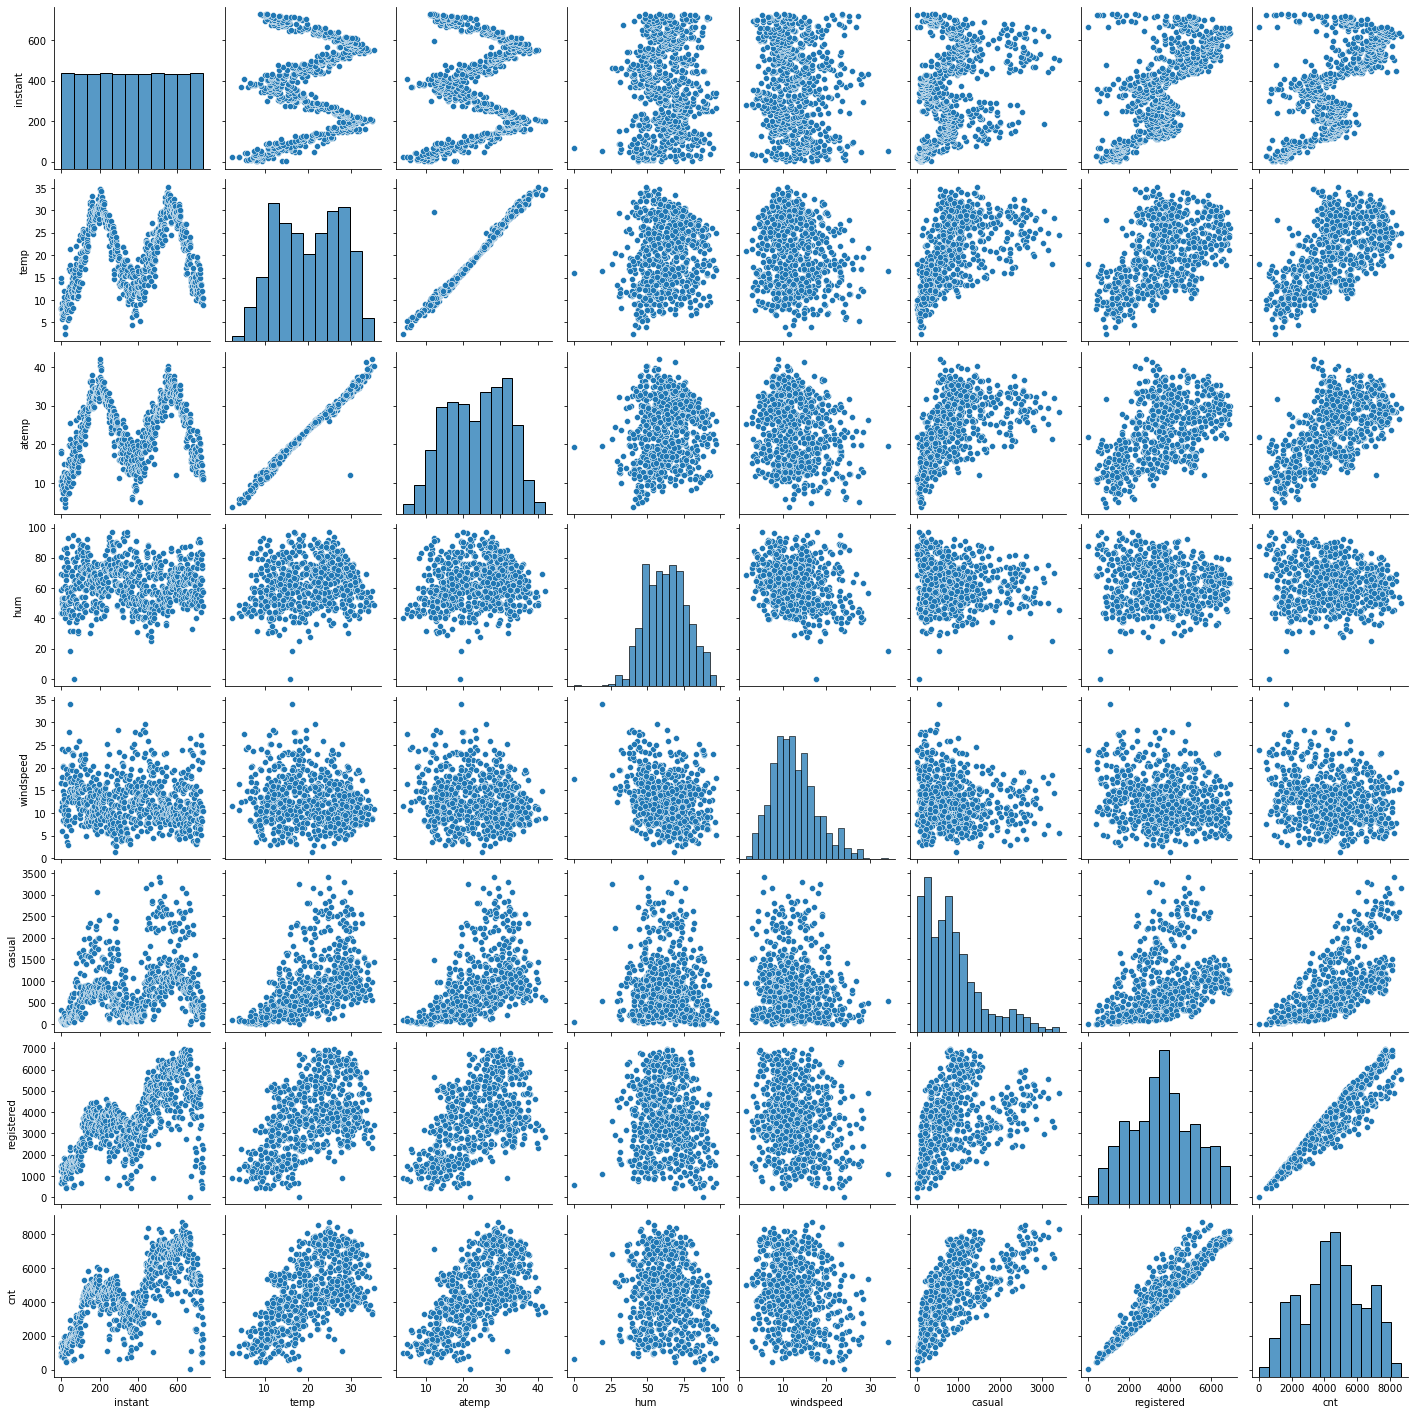

In [7]:
sns.pairplot(df[df.columns.drop(categorical_variables)])

## Visualizing the categorical variables using BoxPlot

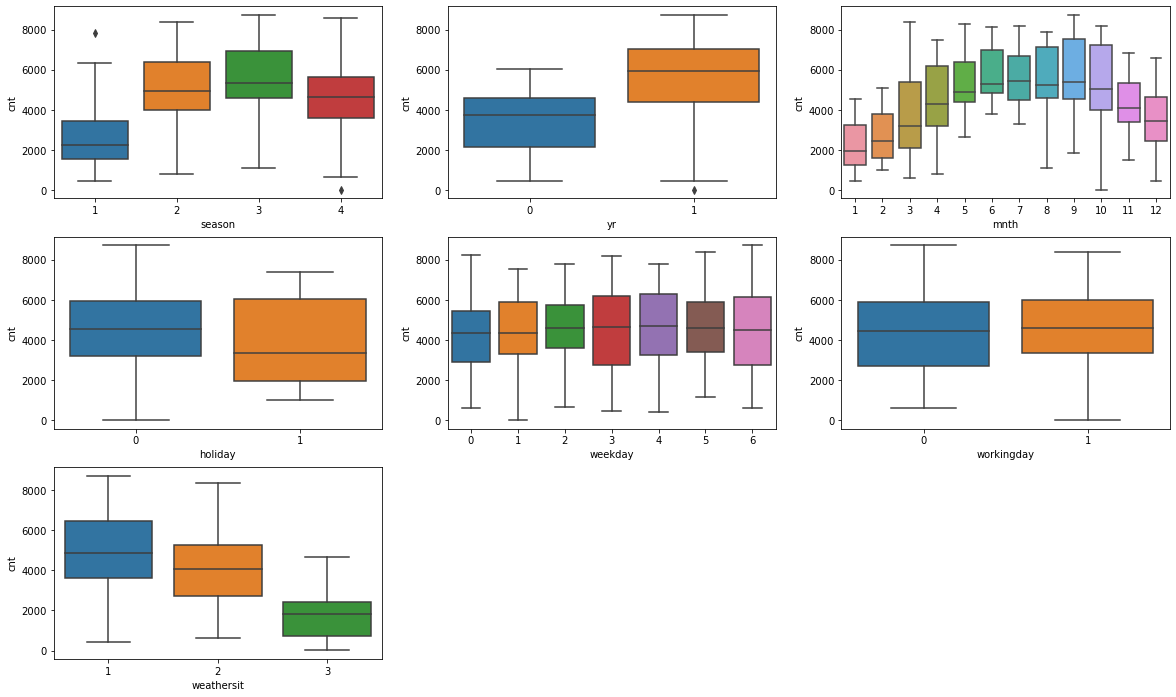

In [8]:
plt.figure(figsize=(20, 12))

for index, variable in enumerate(categorical_variables):
    plt.subplot(3, 3, index + 1)
    sns.boxplot(x=variable, y='cnt', data=df)

plt.show()

# Data Preparation

## Removing redundant columns

In [9]:
# it only contains the record index 1,2,3...
df.pop('instant')

# info about date is already available from columns yr, mnth, weekday
df.pop('dteday')

# casual & registered tells about total number of rentals which is part of the target variable cnt
df.pop('casual')
df.pop('registered')

# remaining are the columns considered for next steps
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## Converting categorical variables to dummy variables

### Creating dummy variable for yr

In [10]:
# convert 0, 1 to 2018, 2019 respectively
df.yr = df.yr.apply(lambda yr: '2018_year' if yr == 0 else '2019_year')

# get dummy variable for yr
# only one column is needed as 2019 = 0 can reflect 2018
years = pd.get_dummies(df.yr, drop_first=True)

# add new column to df and drop yr
df = pd.concat([df, years], axis=1)
df.pop('yr')

df.columns

Index(['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'atemp', 'hum', 'windspeed', 'cnt', '2019_year'],
      dtype='object')

### Creating dummy variable for season

In [11]:
# convert numbers to season labels
all_seasons = [
    'spring_season', 'summer_season', 'fall_season', 'winter_season'
]
df.season = df.season.apply(lambda season: all_seasons[season - 1])

# get dummy variable for season
# only 3 columns are needed as there are total 4 season values
seasons = pd.get_dummies(df.season, drop_first=True)

# add new column to df and drop season
df = pd.concat([df, seasons], axis=1)
df.pop('season')

df.columns

Index(['mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp',
       'atemp', 'hum', 'windspeed', 'cnt', '2019_year', 'spring_season',
       'summer_season', 'winter_season'],
      dtype='object')

### Creating dummy variable for mnth

In [12]:
# convert numbers to month labels
all_mnths = [
    'jan_mnth', 'feb_mnth', 'mar_mnth', 'apr_mnth', 'may_mnth', 'jun_mnth',
    'jul_mnth', 'aug_mnth', 'sep_mnth', 'oct_mnth', 'nov_mnth', 'dec_mnth'
]
df.mnth = df.mnth.apply(lambda mnth: all_mnths[mnth - 1])

# get dummy variable for month
# only 11 columns are needed as there are total 12 months
mnths = pd.get_dummies(df.mnth, drop_first=True)

# add new column to df and drop mnth
df = pd.concat([df, mnths], axis=1)
df.pop('mnth')

df.columns

Index(['holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp',
       'hum', 'windspeed', 'cnt', '2019_year', 'spring_season',
       'summer_season', 'winter_season', 'aug_mnth', 'dec_mnth', 'feb_mnth',
       'jan_mnth', 'jul_mnth', 'jun_mnth', 'mar_mnth', 'may_mnth', 'nov_mnth',
       'oct_mnth', 'sep_mnth'],
      dtype='object')

### Creating dummy variable for weekday

In [13]:
# convert numbers to day labels assuming weekday starts from monday
all_weekdays = [
    'mon_day', 'tue_day', 'wed_day', 'thu_day', 'fri_day', 'sat_day', 'sun_day'
]
df.weekday = df.weekday.apply(lambda weekday: all_weekdays[weekday])

# get dummy variable for weekday
# only 6 columns are needed as there are total 7 week days
weekdays = pd.get_dummies(df.weekday, drop_first=True)

# add new column to df and drop weekday
df = pd.concat([df, weekdays], axis=1)
df.pop('weekday')

df.columns

Index(['holiday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', '2019_year', 'spring_season', 'summer_season',
       'winter_season', 'aug_mnth', 'dec_mnth', 'feb_mnth', 'jan_mnth',
       'jul_mnth', 'jun_mnth', 'mar_mnth', 'may_mnth', 'nov_mnth', 'oct_mnth',
       'sep_mnth', 'mon_day', 'sat_day', 'sun_day', 'thu_day', 'tue_day',
       'wed_day'],
      dtype='object')

### Creating dummy variable for weathersit

In [14]:
# convert numbers to weather kind labels
all_weather_kinds = [
    'clear_weather', 'misty_weather', 'light_snow_weather',
    'heavy_rain_weather'
]
df.weathersit = df.weathersit.apply(
    lambda weathersit: all_weather_kinds[weathersit - 1])

# get dummy variable for weathersit
# only 3 columns are needed as there are total 4 weathersit
weathersits = pd.get_dummies(df.weathersit, drop_first=True)

# add new column to df and drop weathersit
df = pd.concat([df, weathersits], axis=1)
df.pop('weathersit')

df.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       '2019_year', 'spring_season', 'summer_season', 'winter_season',
       'aug_mnth', 'dec_mnth', 'feb_mnth', 'jan_mnth', 'jul_mnth', 'jun_mnth',
       'mar_mnth', 'may_mnth', 'nov_mnth', 'oct_mnth', 'sep_mnth', 'mon_day',
       'sat_day', 'sun_day', 'thu_day', 'tue_day', 'wed_day',
       'light_snow_weather', 'misty_weather'],
      dtype='object')

In [15]:
# Now let's see the head of our dataframe.

df.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,2019_year,spring_season,summer_season,...,oct_mnth,sep_mnth,mon_day,sat_day,sun_day,thu_day,tue_day,wed_day,light_snow_weather,misty_weather
0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,...,0,0,0,0,0,1,0,0,0,0


# Splitting Data into Train and Test

In [16]:
from sklearn.model_selection import train_test_split

np.random.seed(0)

df_train, df_test = train_test_split(df,
                                     train_size=0.7,
                                     test_size=0.3,
                                     random_state=100)

## Rescalaing the Feartures

We will use MinMax scaling to rescale the numeric variables

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [18]:
df_train[numeric_variables] = scaler.fit_transform(df_train[numeric_variables])

In [19]:
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,2019_year,spring_season,summer_season,...,oct_mnth,sep_mnth,mon_day,sat_day,sun_day,thu_day,tue_day,wed_day,light_snow_weather,misty_weather
653,0,1,0.509887,0.501133,0.575354,0.300794,7534,1,0,0,...,1,0,0,0,0,0,0,1,0,0
576,0,1,0.815169,0.766351,0.725633,0.264686,7216,1,0,0,...,0,0,0,0,0,0,0,1,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,4066,1,1,0,...,0,0,0,0,1,0,0,0,0,1
728,0,0,0.245101,0.200348,0.498067,0.663106,1796,1,1,0,...,0,0,1,0,0,0,0,0,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,4220,1,0,1,...,0,0,0,0,1,0,0,0,0,1


In [20]:
df_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,2019_year,spring_season,summer_season,...,oct_mnth,sep_mnth,mon_day,sat_day,sun_day,thu_day,tue_day,wed_day,light_snow_weather,misty_weather
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,4486.382353,0.507843,0.243137,0.245098,...,0.086275,0.080392,0.143137,0.127451,0.154902,0.158824,0.150980,0.131373,0.029412,0.343137
std,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,1952.158739,0.500429,0.429398,0.430568,...,0.281045,0.272166,0.350557,0.333805,0.362166,0.365870,0.358381,0.338139,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,3120.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,4530.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,5973.500000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can now see that all our columns fit between 0 to 1.

## Dividing into X and Y

In [21]:
def divide_into_x_y(df):
    return df[df.columns.drop('cnt')], df.loc[:].pop('cnt')


x_train, y_train = divide_into_x_y(df_train)

# Model Building

## Checking correlation coefficients of variables

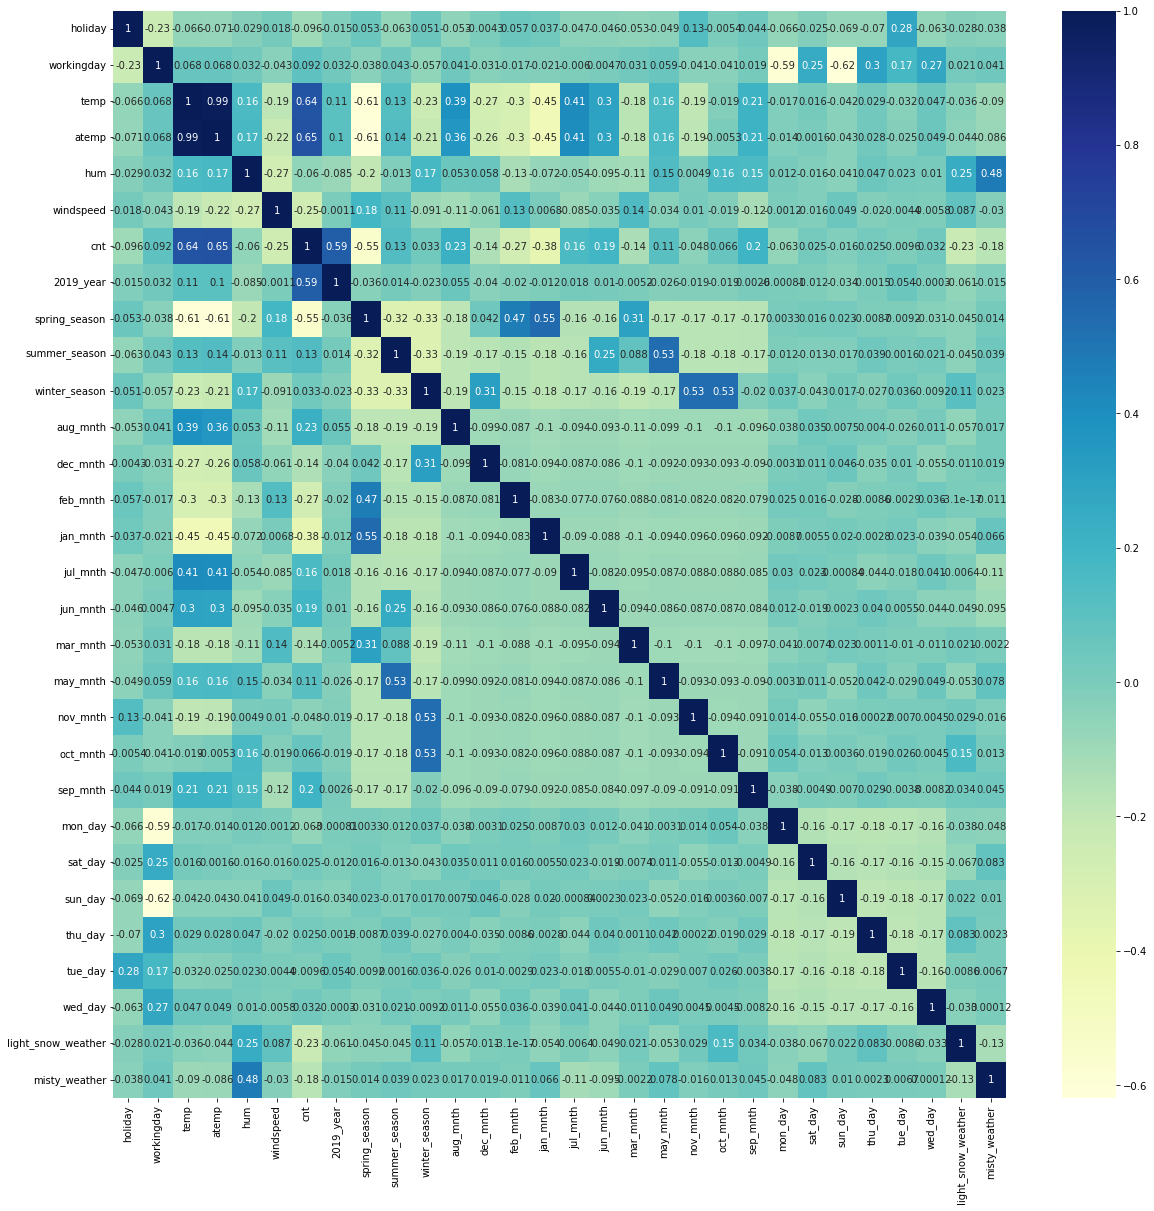

In [22]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_train.corr(), annot=True, cmap="YlGnBu")
plt.show()

We can see that `temp`, `atemp`, `2019_year`, `spring_season` highly correlates with `cnt` and in total there are about 9 columns which have correlation coefficients of >= 0.2 or <= -0.2.

## Selecting initial feature set using Recursive Feature Elimination (RFE)

In [23]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

Based on the correlation coefficients analaysis above, we will target to select top 15 features out of total 30 to begin with using RFE.

In [24]:
# building linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# performing rfe
rfe = RFE(model, n_features_to_select=15)
rfe = rfe.fit(x_train, y_train)

In [25]:
# list of features selected by RFE and their ranking
rfe_learnings = list(zip(x_train.columns, rfe.support_, rfe.ranking_))
rfe_learnings

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('2019_year', True, 1),
 ('spring_season', True, 1),
 ('summer_season', True, 1),
 ('winter_season', True, 1),
 ('aug_mnth', False, 8),
 ('dec_mnth', False, 4),
 ('feb_mnth', False, 5),
 ('jan_mnth', False, 2),
 ('jul_mnth', True, 1),
 ('jun_mnth', False, 14),
 ('mar_mnth', False, 15),
 ('may_mnth', False, 6),
 ('nov_mnth', False, 3),
 ('oct_mnth', False, 12),
 ('sep_mnth', True, 1),
 ('mon_day', True, 1),
 ('sat_day', False, 11),
 ('sun_day', True, 1),
 ('thu_day', False, 13),
 ('tue_day', False, 10),
 ('wed_day', False, 9),
 ('light_snow_weather', True, 1),
 ('misty_weather', True, 1)]

In [26]:
# list of selected columns
rfe_selected_cols = x_train.columns[rfe.support_]
rfe_selected_cols

Index(['holiday', 'workingday', 'temp', 'hum', 'windspeed', '2019_year',
       'spring_season', 'summer_season', 'winter_season', 'jul_mnth',
       'sep_mnth', 'mon_day', 'sun_day', 'light_snow_weather',
       'misty_weather'],
      dtype='object')

In [27]:
# list of unselected columns
rfe_unselected_cols = x_train.columns[~rfe.support_]
rfe_unselected_cols

Index(['atemp', 'aug_mnth', 'dec_mnth', 'feb_mnth', 'jan_mnth', 'jun_mnth',
       'mar_mnth', 'may_mnth', 'nov_mnth', 'oct_mnth', 'sat_day', 'thu_day',
       'tue_day', 'wed_day'],
      dtype='object')

## Building model using the features selected by RFE

In [28]:
import statsmodels.api as sm

In [29]:
# creating training dataframe with selected columns
x_train_rfe = x_train[rfe_selected_cols]

In [30]:
# add constant variable
x_train_rfe = sm.add_constant(x_train_rfe)

In [31]:
# running linear regression model
model = sm.OLS(y_train, x_train_rfe)

model = model.fit()

## Manually eliminating features further

### Iteration 1

In [32]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     195.2
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          3.53e-191
Time:                        08:06:48   Log-Likelihood:                -4109.1
No. Observations:                 510   AIC:                             8248.
Df Residuals:                     495   BIC:                             8312.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3.001e+15   8.63e+15      0.348      0.728    -1.4e+16       2e+16
holiday            -3.001e+15   8.63e+15     -0.348      0.728      -2e+16     1.4e+16
workingday         -3.001e+15   8.63e+15     -0.348      0.728      -2e+16     1.4e+16
temp                4579.2393    290.315     15.773      0.000    4008.838    5149.641
hum                -1381.2485    325.789     -4.240      0.000   -2021.348    -741.149
windspeed          -1567.1729    221.413     -7.078      0.000   -2002.197   -1132.148
2019_year           1995.7658     69.909     28.548      0.000    1858.411    2133.121
spring_season       -486.8576    179.829     -2.707      0.007    -840.180    -133.535
summer_season        456.1938    129.067      3.535      0.000     202.607     709.781
winter_season        868.7774    148.600      5.846      0.000     576.813    1160.742
jul_mnth            -476.0004    157.548     -3.021      0.003    -785.547    -166.454
sep_mnth             710.6741    143.740      4.944      0.000     428.259     993.089
mon_day            -3.001e+15   8.63e+15     -0.348      0.728      -2e+16     1.4e+16
sun_day            -3.001e+15   8.63e+15     -0.348      0.728      -2e+16     1.4e+16
light_snow_weather -2141.7703    227.121     -9.430      0.000   -2588.010   -1695.531
misty_weather       -503.3679     90.666     -5.552      0.000    -681.505    -325.231
==============================================================================
Omnibus:                       66.200   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.526
Skew:                          -0.680   Prob(JB):                     3.77e-35
Kurtosis:                       5.368   Cond. No.                     9.67e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.61e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Based on the initial model build using the 15 features selected by the RFE process we can see that 4 columns i.e. `holiday`, `workingday`, `mon_day` and `sun_day` have high p-value of `0.728`. 

Also in the RFE ranking list all the 4 columns have the ranking of 1. Therefore with the current data alone we won't be able to decide which column out of the 4 should we eliminate at this stage.

As a next step we will find out **Variance Inflation Factor (VIF)** for the 15 features. 

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


# function to calculate VIF based on the dataframe provided
def calculate_vif(x):
    vif = pd.DataFrame()
    vif['Features'] = x.columns
    vif['VIF'] = [
        variance_inflation_factor(x.values, i) for i in range(x.shape[1])
    ]
    vif['VIF'] = round(vif['VIF'], 2)
    return vif.sort_values(by="VIF", ascending=False)

In [34]:
calculate_vif(x_train_rfe[x_train_rfe.columns.drop('const')])

,Features,VIF
1,workingday,50.69
12,sun_day,12.20
11,mon_day,11.79
6,spring_season,5.02
2,temp,3.62
8,winter_season,3.49
0,holiday,2.91
7,summer_season,2.61
3,hum,1.91
14,misty_weather,1.57


**`workingday` has significatnly high VIF value of `50.69`, based on which we will definitely eliminate this feature of out of the 4.**

In [35]:
x_train_rfe = x_train_rfe.drop(["workingday"], axis=1)
x_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   const               510 non-null    float64
 1   holiday             510 non-null    int64  
 2   temp                510 non-null    float64
 3   hum                 510 non-null    float64
 4   windspeed           510 non-null    float64
 5   2019_year           510 non-null    uint8  
 6   spring_season       510 non-null    uint8  
 7   summer_season       510 non-null    uint8  
 8   winter_season       510 non-null    uint8  
 9   jul_mnth            510 non-null    uint8  
 10  sep_mnth            510 non-null    uint8  
 11  mon_day             510 non-null    uint8  
 12  sun_day             510 non-null    uint8  
 13  light_snow_weather  510 non-null    uint8  
 14  misty_weather       510 non-null    uint8  
dtypes: float64(4), int64(1), uint8(10)
memory usage: 28.9 KB

### Iteration 2

In [36]:
# running linear regression model
model = sm.OLS(y_train, x_train_rfe)

model = model.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          1.13e-191
Time:                        08:06:48   Log-Likelihood:                -4107.9
No. Observations:                 510   AIC:                             8246.
Df Residuals:                     495   BIC:                             8309.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2478.3175    296.426      8.361      0.000    1895.909    3060.726
holiday             -892.2342    220.461     -4.047      0.000   -1325.388    -459.080
temp                4587.8062    288.600     15.897      0.000    4020.775    5154.837
hum                -1386.0907    324.739     -4.268      0.000   -2024.127    -748.054
windspeed          -1569.7802    220.774     -7.110      0.000   -2003.550   -1136.010
2019_year           1996.8832     69.674     28.660      0.000    1859.991    2133.776
spring_season       -481.8292    178.833     -2.694      0.007    -833.194    -130.464
summer_season        457.3112    128.729      3.553      0.000     204.389     710.234
winter_season        871.7572    148.010      5.890      0.000     580.952    1162.563
jul_mnth            -477.0247    157.157     -3.035      0.003    -785.802    -168.248
sep_mnth             710.7672    143.407      4.956      0.000     429.005     992.529
mon_day             -375.6335    100.342     -3.744      0.000    -572.783    -178.484
sun_day               86.8071     96.855      0.896      0.371    -103.491     277.105
light_snow_weather -2141.1185    226.588     -9.449      0.000   -2586.312   -1695.925
misty_weather       -502.8092     90.442     -5.559      0.000    -680.507    -325.112
==============================================================================
Omnibus:                       64.879   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.454
Skew:                          -0.661   Prob(JB):                     3.91e-35
Kurtosis:                       5.390   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The new model is only slightly better than the pervious model after removing the `workingday` feature as there is not a considerable improvement in the adjusted r-square. But all the features now have p-values < 0.05 expect `sun_day` which has `0.37` as its p-value.

**We will be removing `sun_day` from the selected features in this iteration**

In [37]:
x_train_rfe = x_train_rfe.drop(["sun_day"], axis=1)
x_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   const               510 non-null    float64
 1   holiday             510 non-null    int64  
 2   temp                510 non-null    float64
 3   hum                 510 non-null    float64
 4   windspeed           510 non-null    float64
 5   2019_year           510 non-null    uint8  
 6   spring_season       510 non-null    uint8  
 7   summer_season       510 non-null    uint8  
 8   winter_season       510 non-null    uint8  
 9   jul_mnth            510 non-null    uint8  
 10  sep_mnth            510 non-null    uint8  
 11  mon_day             510 non-null    uint8  
 12  light_snow_weather  510 non-null    uint8  
 13  misty_weather       510 non-null    uint8  
dtypes: float64(4), int64(1), uint8(9)
memory usage: 28.4 KB


### Iteration 3

In [38]:
# running linear regression model
model = sm.OLS(y_train, x_train_rfe)

model = model.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     211.4
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          1.13e-192
Time:                        08:06:48   Log-Likelihood:                -4108.3
No. Observations:                 510   AIC:                             8245.
Df Residuals:                     496   BIC:                             8304.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2501.0004    295.285      8.470      0.000    1920.837    3081.164
holiday             -909.3891    219.585     -4.141      0.000   -1340.820    -477.958
temp                4583.9206    288.510     15.888      0.000    4017.069    5150.772
hum                -1396.8734    324.452     -4.305      0.000   -2034.343    -759.404
windspeed          -1562.9746    220.600     -7.085      0.000   -1996.400   -1129.549
2019_year           1994.7267     69.618     28.652      0.000    1857.944    2131.510
spring_season       -481.3111    178.796     -2.692      0.007    -832.603    -130.019
summer_season        456.7843    128.702      3.549      0.000     203.916     709.653
winter_season        874.1874    147.956      5.908      0.000     583.490    1164.885
jul_mnth            -474.3904    157.098     -3.020      0.003    -783.051    -165.730
sep_mnth             711.7709    143.374      4.964      0.000     430.075     993.467
mon_day             -391.8089     98.686     -3.970      0.000    -585.704    -197.914
light_snow_weather -2137.8760    226.514     -9.438      0.000   -2582.922   -1692.830
misty_weather       -501.2088     90.407     -5.544      0.000    -678.836    -323.582
==============================================================================
Omnibus:                       61.439   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.341
Skew:                          -0.616   Prob(JB):                     1.85e-34
Kurtosis:                       5.407   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The elimination of `sun_day` feature in the last iteration did not negatively affect the model as the adjusted r-square remains the same are earlier.

All the features have acceptable p-values, therefore we will study the VIF to make further improvements.

In [39]:
calculate_vif(x_train_rfe[x_train_rfe.columns.drop('const')])

,Features,VIF
2,hum,28.28
1,temp,16.03
3,windspeed,4.65
5,spring_season,4.01
7,winter_season,3.35
6,summer_season,2.78
12,misty_weather,2.30
4,2019_year,2.08
8,jul_mnth,1.59
9,sep_mnth,1.39


**We can see that `hum` (humidity) feature has a un-acceptable VIF of 2.28 therefore we will be eliminating the feature in this iteration.**

In [40]:
x_train_rfe = x_train_rfe.drop(["hum"], axis=1)
x_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   const               510 non-null    float64
 1   holiday             510 non-null    int64  
 2   temp                510 non-null    float64
 3   windspeed           510 non-null    float64
 4   2019_year           510 non-null    uint8  
 5   spring_season       510 non-null    uint8  
 6   summer_season       510 non-null    uint8  
 7   winter_season       510 non-null    uint8  
 8   jul_mnth            510 non-null    uint8  
 9   sep_mnth            510 non-null    uint8  
 10  mon_day             510 non-null    uint8  
 11  light_snow_weather  510 non-null    uint8  
 12  misty_weather       510 non-null    uint8  
dtypes: float64(3), int64(1), uint8(9)
memory usage: 24.4 KB


### Iteration 4

In [41]:
# running linear regression model
model = sm.OLS(y_train, x_train_rfe)

model = model.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          6.45e-190
Time:                        08:06:48   Log-Likelihood:                -4117.7
No. Observations:                 510   AIC:                             8261.
Df Residuals:                     497   BIC:                             8316.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1814.9912    252.952      7.175      0.000    1318.004    2311.979
holiday             -919.0795    223.413     -4.114      0.000   -1358.030    -480.129
temp                4269.1786    283.975     15.034      0.000    3711.239    4827.118
windspeed          -1285.6615    214.677     -5.989      0.000   -1707.447    -863.876
2019_year           2028.4443     70.386     28.819      0.000    1890.153    2166.736
spring_season       -567.6582    180.775     -3.140      0.002    -922.836    -212.480
summer_season        403.0375    130.335      3.092      0.002     146.961     659.114
winter_season        748.0932    147.565      5.070      0.000     458.166    1038.020
jul_mnth            -430.8521    159.514     -2.701      0.007    -744.257    -117.447
sep_mnth             659.3979    145.356      4.536      0.000     373.810     944.986
mon_day             -421.3808    100.169     -4.207      0.000    -618.188    -224.574
light_snow_weather -2524.2332    211.617    -11.928      0.000   -2940.008   -2108.458
misty_weather       -726.0744     75.084     -9.670      0.000    -873.595    -578.554
==============================================================================
Omnibus:                       63.147   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.837
Skew:                          -0.632   Prob(JB):                     1.96e-35
Kurtosis:                       5.434   Cond. No.                         17.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In the new model we can see a slight decrease in r-square and adjusted r-square but we consider it healthy as to protect the model from overfitting due to including metrics which are highly correalated with other present metrics.

As a next step we will study VIF of the remaining features as off the features already have acceptable p-values.

In [42]:
calculate_vif(x_train_rfe[x_train_rfe.columns.drop('const')])

,Features,VIF
1,temp,5.14
2,windspeed,4.60
5,summer_season,2.22
4,spring_season,2.11
3,2019_year,2.07
6,winter_season,1.82
7,jul_mnth,1.59
11,misty_weather,1.55
8,sep_mnth,1.34
9,mon_day,1.18


**We can see the `temp` feature still have VIF in un-acceptable range i.e. > 5. Therefore we will be eliminating the feature.**

In [43]:
x_train_rfe = x_train_rfe.drop(["temp"], axis=1)
x_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   const               510 non-null    float64
 1   holiday             510 non-null    int64  
 2   windspeed           510 non-null    float64
 3   2019_year           510 non-null    uint8  
 4   spring_season       510 non-null    uint8  
 5   summer_season       510 non-null    uint8  
 6   winter_season       510 non-null    uint8  
 7   jul_mnth            510 non-null    uint8  
 8   sep_mnth            510 non-null    uint8  
 9   mon_day             510 non-null    uint8  
 10  light_snow_weather  510 non-null    uint8  
 11  misty_weather       510 non-null    uint8  
dtypes: float64(2), int64(1), uint8(9)
memory usage: 20.4 KB


### Iteration 5

In [44]:
# running linear regression model
model = sm.OLS(y_train, x_train_rfe)

model = model.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     151.0
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          9.32e-151
Time:                        08:06:48   Log-Likelihood:                -4213.3
No. Observations:                 510   AIC:                             8451.
Df Residuals:                     498   BIC:                             8501.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5156.9510    145.432     35.460      0.000    4871.216    5442.686
holiday             -946.3393    269.186     -3.516      0.000   -1475.219    -417.460
windspeed          -1482.2850    258.187     -5.741      0.000   -1989.556    -975.014
2019_year           2147.3366     84.273     25.481      0.000    1981.763    2312.910
spring_season      -2596.3207    144.944    -17.913      0.000   -2881.097   -2311.545
summer_season       -392.1305    143.531     -2.732      0.007    -674.131    -110.131
winter_season       -650.9405    137.989     -4.717      0.000    -922.052    -379.829
jul_mnth             -88.5139    190.233     -0.465      0.642    -462.272     285.244
sep_mnth             623.1467    175.118      3.558      0.000     279.086     967.207
mon_day             -425.1773    120.695     -3.523      0.000    -662.311    -188.043
light_snow_weather -2627.2192    254.848    -10.309      0.000   -3127.929   -2126.509
misty_weather       -807.8833     90.232     -8.953      0.000    -985.165    -630.602
==============================================================================
Omnibus:                       27.791   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.314
Skew:                          -0.297   Prob(JB):                     1.32e-13
Kurtosis:                       4.561   Cond. No.                         9.22
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The new model has a lower r-square as well as lower ajusted r-square but eliminating the correlated features saves us from overfitting and better results with test data.

**`jul_mnth` feature has `0.642` p-value which is in un-acceptable range. Therefore we will be eliminating the feature.**

In [45]:
x_train_rfe = x_train_rfe.drop(["jul_mnth"], axis=1)
x_train_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 653 to 79
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   const               510 non-null    float64
 1   holiday             510 non-null    int64  
 2   windspeed           510 non-null    float64
 3   2019_year           510 non-null    uint8  
 4   spring_season       510 non-null    uint8  
 5   summer_season       510 non-null    uint8  
 6   winter_season       510 non-null    uint8  
 7   sep_mnth            510 non-null    uint8  
 8   mon_day             510 non-null    uint8  
 9   light_snow_weather  510 non-null    uint8  
 10  misty_weather       510 non-null    uint8  
dtypes: float64(2), int64(1), uint8(8)
memory usage: 19.9 KB


### Iteration 6

In [46]:
# running linear regression model
model = sm.OLS(y_train, x_train_rfe)

model = model.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     166.3
Date:                Wed, 21 Sep 2022   Prob (F-statistic):          7.84e-152
Time:                        08:06:48   Log-Likelihood:                -4213.4
No. Observations:                 510   AIC:                             8449.
Df Residuals:                     499   BIC:                             8495.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5124.3656    127.359     40.236      0.000    4874.139    5374.592
holiday             -944.5501    268.947     -3.512      0.000   -1472.958    -416.142
windspeed          -1481.5310    257.980     -5.743      0.000   -1988.391    -974.671
2019_year           2147.6857     84.203     25.506      0.000    1982.249    2313.122
spring_season      -2564.9390    128.195    -20.008      0.000   -2816.807   -2313.071
summer_season       -360.7693    126.621     -2.849      0.005    -609.545    -111.993
winter_season       -621.1756    122.169     -5.085      0.000    -861.204    -381.147
sep_mnth             647.8295    166.759      3.885      0.000     320.194     975.465
mon_day             -427.2511    120.518     -3.545      0.000    -664.036    -190.466
light_snow_weather -2628.3499    254.636    -10.322      0.000   -3128.641   -2128.059
misty_weather       -805.0592     89.957     -8.949      0.000    -981.800    -628.319
==============================================================================
Omnibus:                       27.872   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.127
Skew:                          -0.301   Prob(JB):                     1.45e-13
Kurtosis:                       4.556   Cond. No.                         8.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see a slight increase in the adjusted r-square while r-square remained constant, which is a sign of a better model. All the features have acceptable p-values, thus we will next study VIF to examine if we still have multi-correlated features.

In [47]:
calculate_vif(x_train_rfe[x_train_rfe.columns.drop('const')])

,Features,VIF
1,windspeed,3.49
3,spring_season,1.92
4,summer_season,1.86
2,2019_year,1.78
5,winter_season,1.66
9,misty_weather,1.51
7,mon_day,1.16
6,sep_mnth,1.14
8,light_snow_weather,1.08
0,holiday,1.05


**All the features have acceptable VIF scores. Therefore we will move onto doing residual analysis with test data**

# Residual Analysis with Train Data

In [48]:
# predicting cnt using train data
y_train_pred = model.predict(x_train_rfe)

Text(0.5, 0, 'Errors')

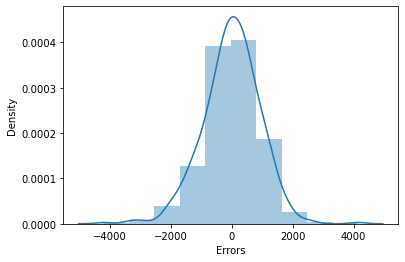

In [49]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins=10)
plt.xlabel('Errors')

**We can see a normal distribution of error terms**

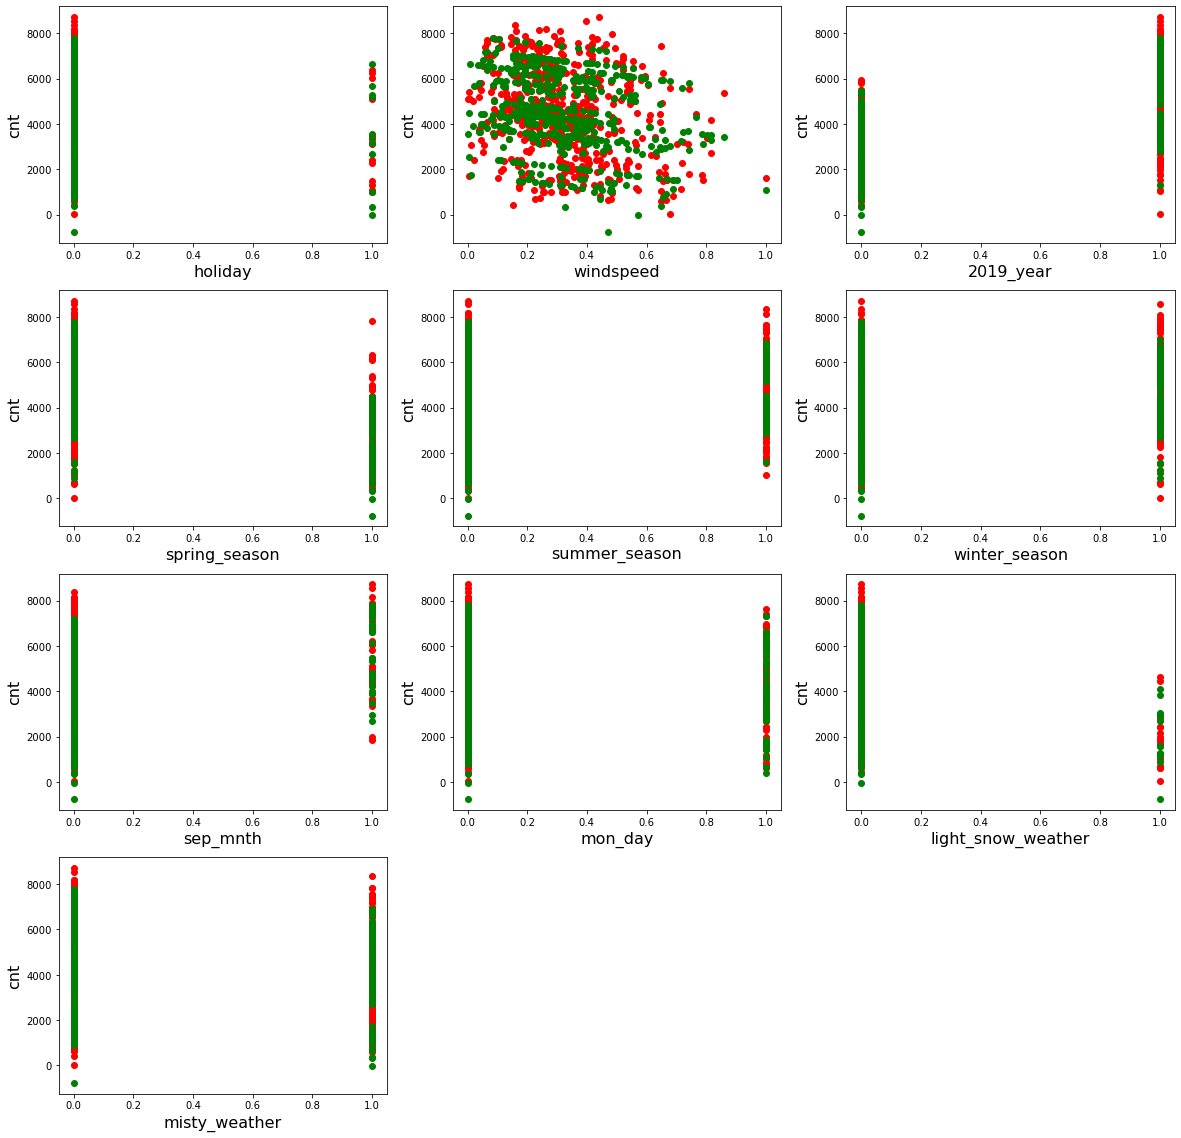

In [50]:
# scatter plots for actual vs predicted values for train data set
plt.figure(figsize=(20, 20))

for index, col in enumerate(x_train_rfe.columns.drop('const')):
    plt.subplot(4, 3, index + 1)
    plt.scatter(x_train_rfe[col], y_train, color="red")
    plt.scatter(x_train_rfe[col], y_train_pred, color="green")
    plt.xlabel(col, fontsize=16)
    plt.ylabel("cnt", fontsize=16)

plt.show()

In [51]:
## find r-square for predictions with training data
from sklearn.metrics import r2_score

round(r2_score(y_train, y_train_pred), 2)

0.77

# Making Predictions using Test Data

## Preparing test data for prediction

In [52]:
# applying scaling to the test data set
df_test[numeric_variables] = scaler.transform(df_test[numeric_variables])

In [53]:
# divide data set in x, y
x_test, y_test = divide_into_x_y(df_test)

In [54]:
# addding constant variable
x_test = sm.add_constant(x_test)

# select only model's feature columns from x_test
x_test = x_test[x_train_rfe.columns]

x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   const               219 non-null    float64
 1   holiday             219 non-null    int64  
 2   windspeed           219 non-null    float64
 3   2019_year           219 non-null    uint8  
 4   spring_season       219 non-null    uint8  
 5   summer_season       219 non-null    uint8  
 6   winter_season       219 non-null    uint8  
 7   sep_mnth            219 non-null    uint8  
 8   mon_day             219 non-null    uint8  
 9   light_snow_weather  219 non-null    uint8  
 10  misty_weather       219 non-null    uint8  
dtypes: float64(2), int64(1), uint8(8)
memory usage: 8.6 KB


## Making predictions and evaluating

In [55]:
# making prediction
y_test_pred = model.predict(x_test)

Text(0, 0.5, 'y_test_pred')

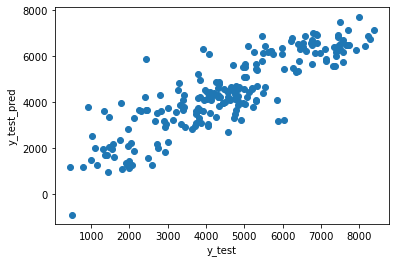

In [56]:
# Plotting y_test and y_test_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

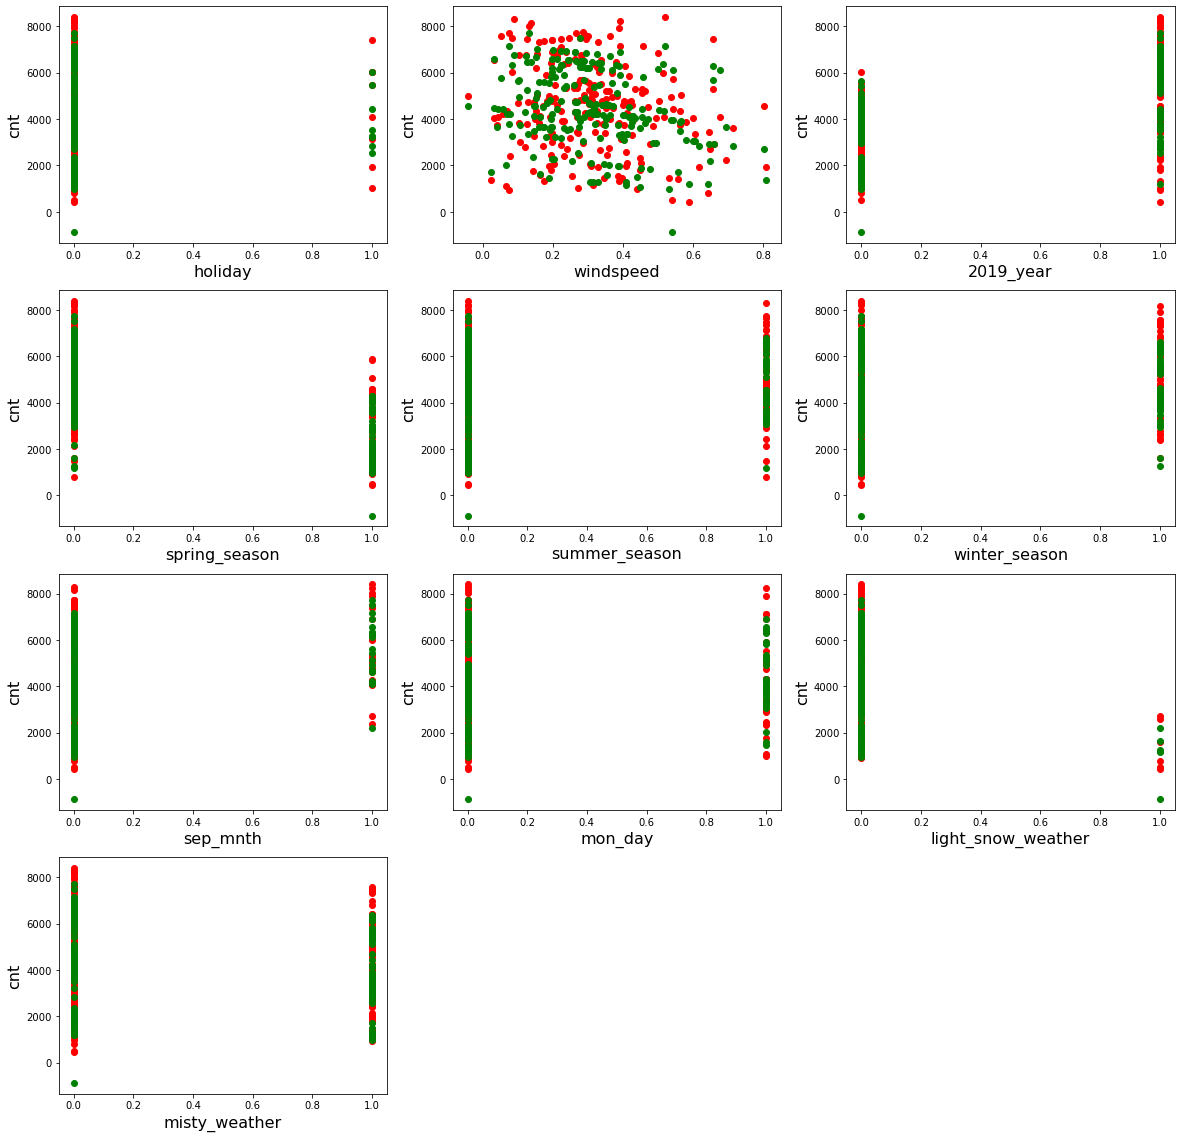

In [57]:
# scatter plots for actual vs predicted values for test data set
plt.figure(figsize=(20, 20))

for index, col in enumerate(x_test.columns.drop('const')):
    plt.subplot(4, 3, index + 1)
    plt.scatter(x_test[col], y_test, color="red")
    plt.scatter(x_test[col], y_test_pred, color="green")
    plt.xlabel(col, fontsize=16)
    plt.ylabel("cnt", fontsize=16)

plt.show()

In [58]:
## find r-square for predictions with test data
round(r2_score(y_test, y_test_pred), 2)

0.75

### Conclusion
- r-square for train data set is 0.77
- r-square for test data set is 0.75
- list of features used for the prediction are:
    - holiday
    - windspeed
    - 2019_year
    - spring_season
    - summer_season
    - winter_season
    - sep_mnth
    - mon_day
    - light_snow_weather
    - misty_weather
- `cnt = 5124.3656 - 944.5501 * holiday - 1481.5310 * windspeed + 2147.6857 * 2019_year - 2564.9390 * spring_season - 360.7693 * summer_season - 621.1756 * winter_season + 647.8295 * sep_mnth - 427.2511 * mon_day - 2628.3499 * light_snow_weather - 805.0592 * misty_weather`